In [1]:
from __future__ import absolute_import
from __future__ import print_function

import os
import sys
import optparse
import subprocess
import random

import sqlite3

import csv

import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns

import pygraphviz

# import scipy

In [2]:
conn = sqlite3.connect('database.db')
conn.text_factory = str
c = conn.cursor()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9977abc88>],
      dtype=object)

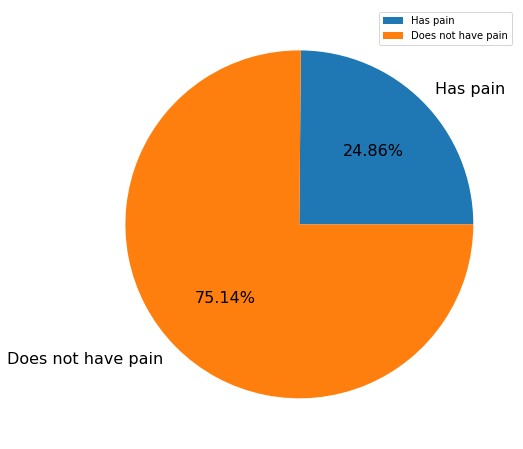

In [3]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1"
  
x = ["Has pain", "Does not have pain"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd966fb2cf8>],
      dtype=object)

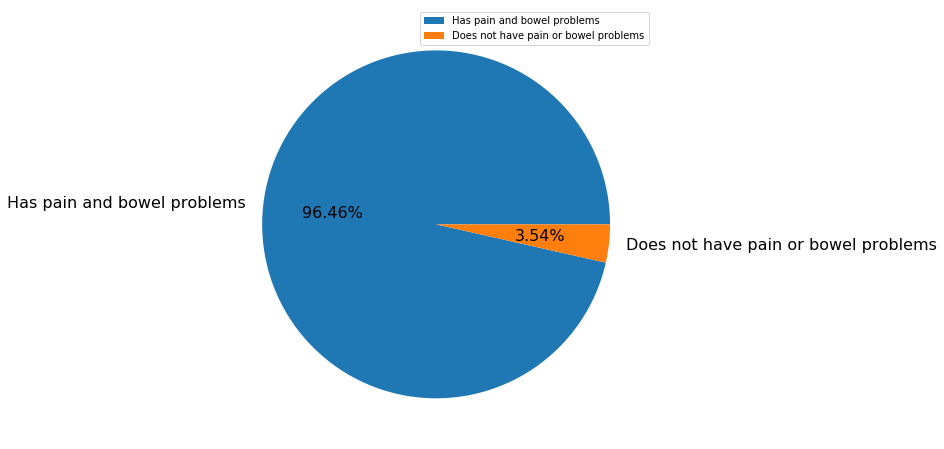

In [4]:
condition = "( bowel_health.BHQ010_b = 1 OR bowel_health.BHQ020_b = 1 OR bowel_health.BHQ030_b = 1 OR bowel_health.BHQ040_b = 1 OR bowel_health.BHD050_b = 1 )"
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN JOIN bowel_health ON bowel_health.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 1 AND "+condition
  
x = ["Has pain and bowel problems", "Does not have pain or bowel problems"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
condition = "( bowel_health.BHQ010_b = 0 AND bowel_health.BHQ020_b = 0 AND bowel_health.BHQ030_b = 0 AND bowel_health.BHQ040_b = 0 AND bowel_health.BHD050_b = 0 )"
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN JOIN bowel_health ON bowel_health.SEQN = patients.SEQN WHERE health_status.HSQ493_b = 0 AND "+condition 
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd966effac8>],
      dtype=object)

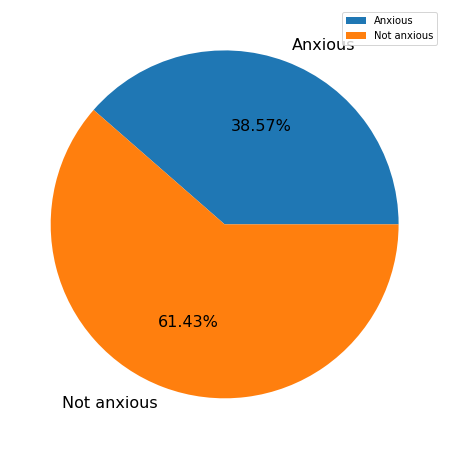

In [5]:
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 1"

x = ["Anxious", "Not anxious"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN health_status ON health_status.SEQN = patients.SEQN WHERE health_status.HSQ496_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%',fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd966ed6a90>],
      dtype=object)

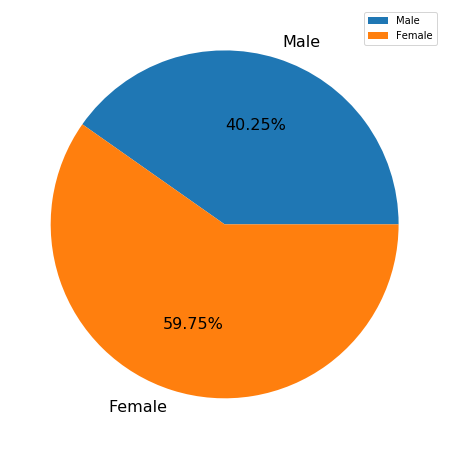

In [6]:
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 1"

x = ["Male", "Female"]
y = []
for row in c.execute(query):
  y.append(int(row[0]))
query = "SELECT COUNT(*) FROM patients JOIN basic_information ON basic_information.SEQN = patients.SEQN WHERE basic_information.RIAGENDR = 2"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

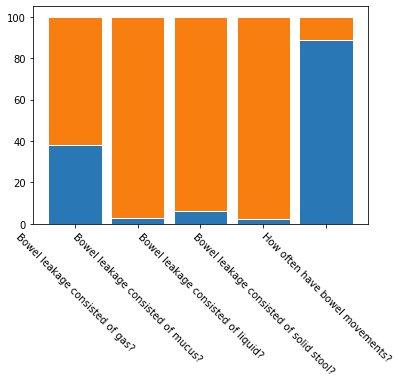

In [7]:
BHQ010 = 'Bowel leakage consisted of gas?'
BHQ020 = 'Bowel leakage consisted of mucus?'
BHQ030 = 'Bowel leakage consisted of liquid?'
BHQ040 = 'Bowel leakage consisted of solid stool?'
BHD050 = 'How often have bowel movements?'

yes = []
no = []
cond1 = ['bowel_health.BHQ010_b = 1', 'bowel_health.BHQ020_b = 1', 'bowel_health.BHQ030_b = 1', 'bowel_health.BHQ040_b = 1', 'bowel_health.BHD050_b = 1']
cond2 = ['bowel_health.BHQ010_b = 0', 'bowel_health.BHQ020_b = 0', 'bowel_health.BHQ030_b = 0', 'bowel_health.BHQ040_b = 0', 'bowel_health.BHD050_b = 0']

for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[0]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[0]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[1]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[1]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[2]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[2]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[3]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[3]):
 no.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond1[4]):
 yes.append(row[0])
for row in c.execute("SELECT COUNT(*) as c FROM bowel_health WHERE "+cond2[4]):
 no.append(row[0])
    
# Data
r = [0,1,2,3,4]
raw_data = {'blueBars': yes, 'orangeBars': no}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['blueBars'], df['orangeBars'])]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
barWidth = 0.85
names = (BHQ010, BHQ020, BHQ030, BHQ040, BHD050)
# Create green Bars
plt.bar(r, blueBars, color='#2977b4', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=blueBars, color='#f77e0f', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(r, names,rotation=-45)
# plt.xlabel("Bowel health")
 
# Show graphic
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd966eb4ba8>],
      dtype=object)

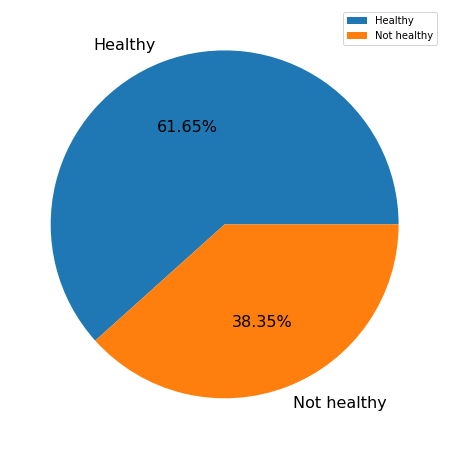

In [8]:
#How healthy is the diet?
x = ["Healthy", "Not healthy"]
y = []
query = "SELECT COUNT(*) FROM nutrition JOIN patients ON patients.SEQN = nutrition.SEQN WHERE nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM nutrition JOIN patients ON patients.SEQN = nutrition.SEQN WHERE nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9665870f0>],
      dtype=object)

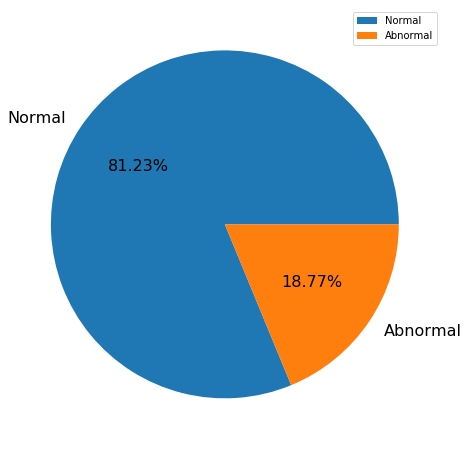

In [9]:
#ferritin
x = ["Normal", "Abnormal"]
y = []
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN WHERE ferritin.LBXFER_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN WHERE ferritin.LBXFER_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9665518d0>],
      dtype=object)

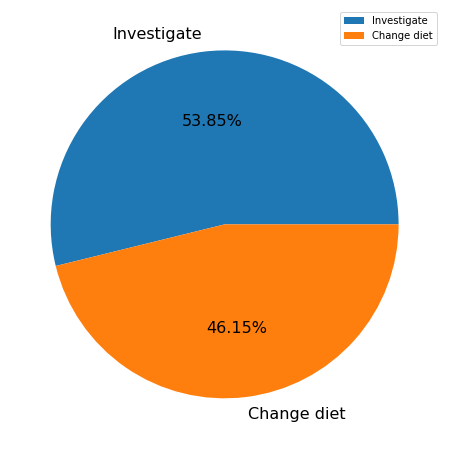

In [10]:
x = ["Investigate", "Change diet"]
y = []

query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd96652a400>],
      dtype=object)

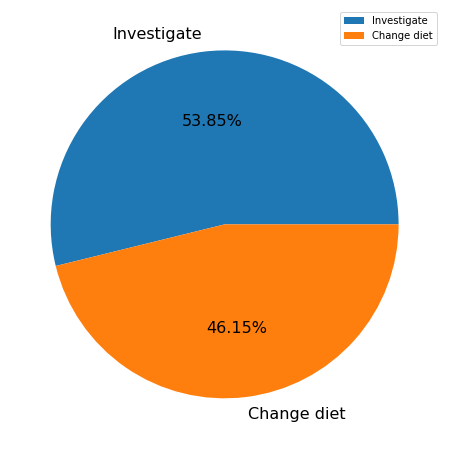

In [11]:
x = ["Investigate", "Change diet"]
y = []

query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 0"
for row in c.execute(query):
   y.append(int(row[0]))
query = "SELECT COUNT(*) FROM ferritin JOIN patients ON patients.SEQN = ferritin.SEQN JOIN nutrition ON patients.SEQN = nutrition.SEQN WHERE ferritin.LBXFER_b = 1 AND nutrition.DBQ700_b = 1"
for row in c.execute(query):
   y.append(int(row[0]))

df = pd.DataFrame(y, x, columns=[''])
df.plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%.2f%%', fontsize=16)

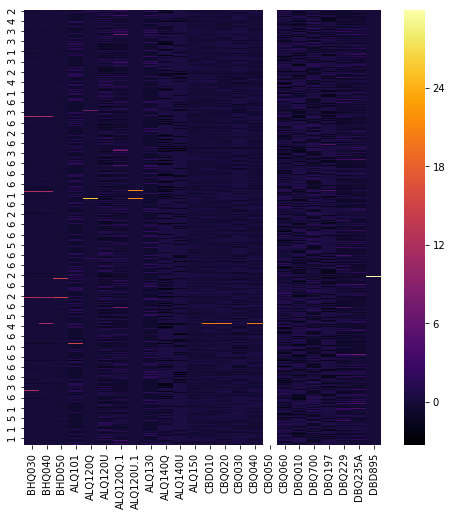

In [12]:
# Data set
queries = []

bowel_health = "BHQ010, BHQ020, BHQ030, BHQ040, BHD050, "
alcohol_use = "ALQ101, ALQ120Q, ALQ120U, ALQ130, ALQ140Q, ALQ140U, ALQ150, "
consumer_behavior = "CBD010, CBQ020, CBQ030, CBQ040, CBQ050, CBQ060, "
nutrition = "DBQ010, DBQ700, DBQ197, DBQ229, DBQ235A, DBD895, DBD900, DBD905, DBD910, DBQ920, DBQ925A, DBQ925B, DBQ925C, DBQ925D, DBQ925E, DBQ925F, DBQ925G, DBQ925H, DBQ925I, DBQ925J,"
health_status = "HSQ470, HSQ480, HSQ490, HSQ493, HSQ496, HSQ500, HSQ510"
  
registers = bowel_health+alcohol_use+consumer_behavior+nutrition+health_status

q = "SELECT "+registers+" FROM patients p JOIN bowel_health ON  bowel_health.SEQN = p.SEQN "+\
    "JOIN alcohol_use ON  alcohol_use.SEQN = p.SEQN JOIN consumer_behavior ON  consumer_behavior.SEQN = p.SEQN "+\
    "JOIN nutrition ON  nutrition.SEQN = p.SEQN JOIN health_status ON  health_status.SEQN = p.SEQN "
for row in c.execute(q):
    queries.append(row)

names = ["BHQ010", "BHQ020", "BHQ030", "BHQ040", "BHD050", "ALQ101", "ALQ120Q",
     "ALQ120U", "ALQ120Q", "ALQ120U", "ALQ130", "ALQ140Q", "ALQ140U", "ALQ150",
    "CBD010", "CBQ020", "CBQ030", "CBQ040", "CBQ050", "CBQ060",
    "DBQ010", "DBQ700", "DBQ197", "DBQ229", "DBQ235A", 
    "DBD895", "DBD900", "DBD905", "DBD910", "DBQ920", "DBQ925A", "DBQ925B", 
    "DBQ925C", "DBQ925D", "DBQ925E", "DBQ925F", "DBQ925G", "DBQ925H",
    "DBQ925I", "DBQ925J","HSQ470", "HSQ480", "HSQ490", "HSQ493", "HSQ496",
    "HSQ500","HSQ510"]
with open('features.csv', mode='w') as result_file:
    result_writer = csv.writer(result_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    result_writer.writerow(names)
    for query in queries:
        result_writer.writerow([0 if x=='nan' else x for x in query])
        
df = pd.read_csv('features.csv')
df = df.set_index('BHQ010')
del df.index.name
df

#normalized
df_norm_col=(df-df.mean())/df.std()

fig, ax = plt.subplots(figsize=(8,8))   
pd.DataFrame(df_norm_col, columns=names)
sns.heatmap(df_norm_col.iloc[:, 1:25:], cmap="inferno", ax=ax)

# sns.set_style("ticks")
# sns.boxplot(data=df_norm_col)

# sns.clustermap(df, z_score=1)